In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#0.load data
dt=pd.read_csv("D:\Data\python\data0.csv") 

#show the top 5 rows of data
dt.head() 

,id,grp1,grp2,cov1,cov2,cov3,cov4,f1,f2,f3,f4,out1,out2,out3,out4,out4t
0,1,0,2,10.588393,5.765045,0,2,8.883864,0.791934,1,1,5.031413,0,1,1,201
1,2,1,0,10.095498,5.273806,0,1,8.497210,0.881411,1,0,5.737039,0,2,1,125
2,3,0,2,10.221286,5.135972,1,2,8.175174,0.177713,0,2,5.387061,1,2,0,152
3,4,1,3,10.884562,5.459708,0,0,8.421732,0.052869,1,3,5.031891,0,2,1,148
4,5,0,2,10.707055,5.306728,0,1,8.714487,0.128239,1,1,5.337904,1,1,0,127


In [3]:
#1.ROC curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

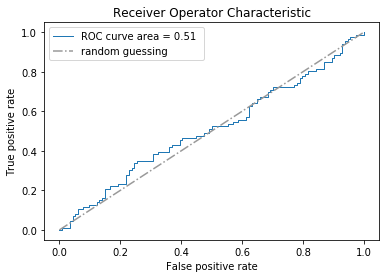

In [4]:
y=dt["out2"]
x_score=dt["out1"]
fpr,tpr,thd=roc_curve(y,x_score)
roc_auc=auc(fpr,tpr)

plt.plot(fpr,tpr,lw=1,label="ROC curve area = %0.2f "%(roc_auc))
plt.plot([0,1],[0,1],linestyle="-.",color=(0.6,0.6,0.6),label="random guessing")
plt.title("Receiver Operator Characteristic")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc="upper left")
plt.show()

In [5]:
aucs=roc_auc_score(y,x_score)
aucs

0.51060791513667891

In [6]:
#2. Survival analysis

In [30]:
#2.1 Cox model
x_sv=dt[["f1","f2","cov1","cov2","cov3","out4","out4t"]]
x_sv.head()

,f1,f2,cov1,cov2,cov3,out4,out4t
0,8.883864,0.791934,10.588393,5.765045,0,1,201
1,8.497210,0.881411,10.095498,5.273806,0,1,125
2,8.175174,0.177713,10.221286,5.135972,1,0,152
3,8.421732,0.052869,10.884562,5.459708,0,1,148
4,8.714487,0.128239,10.707055,5.306728,0,0,127


In [31]:
import statsmodels.api as sm
sf=sm.SurvfuncRight(x_sv["out4"],x_sv["out4t"])

AttributeError: module 'statsmodels.api' has no attribute 'SurvfuncRight'

In [32]:
#Cox model for survival analysis
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [40]:
mod = smf.phreg("out4t ~ 0 + f1 + f2 + cov1 + cov2 + cov3",x_sv, status=x_sv["out4"], ties="efron")
rslt = mod.fit()
rslt.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: PHReg
==========================================================
Model:                   PH Reg      Sample size:      199
Dependent variable:      out4t       Num. events:      93 
Ties:                    Efron                            
----------------------------------------------------------
      log HR log HR SE   HR      t    P>|t|  [0.025 0.975]
----------------------------------------------------------
f1    0.0530    0.3782 1.0544  0.1401 0.8886 0.5024 2.2130
f2   -0.0493    0.3768 0.9519 -0.1309 0.8958 0.4548 1.9922
cov1 -0.3319    0.3615 0.7175 -0.9182 0.3585 0.3533 1.4574
cov2  0.1915    0.3757 1.2111  0.5098 0.6102 0.5799 2.5291
cov3 -0.1206    0.2194 0.8864 -0.5497 0.5825 0.5766 1.3626
==========================================================
Confidence intervals are for the hazard ratios
"""

In [41]:
#3. Time series analysis

In [42]:
x_tsa=dt[["grp1","cov1","cov2","f1","f2","out4","out4t",]]
x_tsa.head()

,grp1,cov1,cov2,f1,f2,out4,out4t
0,0,10.588393,5.765045,8.883864,0.791934,1,201
1,1,10.095498,5.273806,8.497210,0.881411,1,125
2,0,10.221286,5.135972,8.175174,0.177713,0,152
3,1,10.884562,5.459708,8.421732,0.052869,1,148
4,0,10.707055,5.306728,8.714487,0.128239,0,127


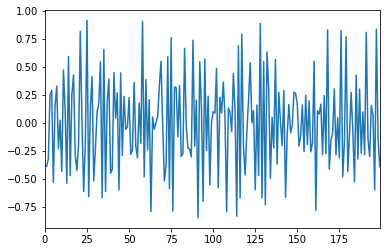

In [62]:
x_tsa["f1"].diff(1).plot()
plt.show()

In [61]:
from statsmodels.tsa.stattools import acf,pacf
tsa_acf=pd.DataFrame(acf(x_tsa["f2"].diff(2)),columns=["Acf"])
tsa_acf["Pacf"]=pd.DataFrame(pacf(x_tsa["f2"].diff(2)))
tsa_acf.head()

,Acf,Pacf
0,NaN,1.0
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
